Introducción a Pandas
===

* *90:00 min* | Última modificación: Agosto 24, 2021 | [YouTube]

In [1]:
import numpy as np
import pandas as pd

In [2]:
#
# Creación de un dataframe desde un diccioario
# ===============================================
#
avengers_df = pd.DataFrame(
    {
        "real_name": [
            "Steve Rogers",
            "Clinton Francis Barton",
            "Pietro Maximoff",
            "Wanda Maximoff",
            "Natasha Alianovna Romanoff",
            'Dr. Henry Philip "Hank" McCoy',
            'Samuel "Snap" Thomas Wilson',
        ],
        "character": [
            "Captain America",
            "Hawkeye",
            "Quicksilver",
            "Scarlet Witch",
            "Black Widow",
            "Beast",
            "Falcon",
            

        ],
        "gender": [
            "M",
            "M",
            "M",
            "F",
            "F",
            "M",
            "M",
        ],
    } 
)

avengers_df

real_name        character gender
0                   Steve Rogers  Captain America      M
1         Clinton Francis Barton          Hawkeye      M
2                Pietro Maximoff      Quicksilver      M
3                 Wanda Maximoff    Scarlet Witch      F
4     Natasha Alianovna Romanoff      Black Widow      F
5  Dr. Henry Philip "Hank" McCoy            Beast      M
6    Samuel "Snap" Thomas Wilson           Falcon      M

In [3]:
#
# Selección de un subconjunto de columnas
# ===============================================
#
subset_df = avengers_df[['real_name', 'gender']]
subset_df

real_name gender
0                   Steve Rogers      M
1         Clinton Francis Barton      M
2                Pietro Maximoff      M
3                 Wanda Maximoff      F
4     Natasha Alianovna Romanoff      F
5  Dr. Henry Philip "Hank" McCoy      M
6    Samuel "Snap" Thomas Wilson      M

In [4]:
#
# Agrupamiento
# ===============================================
#
grouped_df = avengers_df.groupby(by='gender').count()
grouped_df

real_name  character
gender                      
F               2          2
M               5          5

In [5]:
#
# Descarga manual de un archivo desde una 
# ubicación en la web
# ===============================================
#
url = "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/gapminder.csv"
!wget {url} -P /tmp/

--2021-09-03 18:25:19--  https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/gapminder.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7862 (7.7K) [text/plain]
Saving to: ‘/tmp/gapminder.csv.2’

gapminder.csv.2     100%[===================>]   7.68K  --.-KB/s    in 0.003s  

2021-09-03 18:25:19 (2.69 MB/s) - ‘/tmp/gapminder.csv.2’ saved [7862/7862]



In [6]:
#
# Creación del dataframe desde el archivo en
# disco
# ===============================================
#
gapminder_from_disk = pd.read_csv("/tmp/gapminder.csv", index_col=0)
gapminder_from_disk.head()

country  year  population      cont  life_exp       gdp_cap
11  Afghanistan  2007  31889923.0      Asia    43.828    974.580338
23      Albania  2007   3600523.0    Europe    76.423   5937.029526
35      Algeria  2007  33333216.0    Africa    72.301   6223.367465
47       Angola  2007  12420476.0    Africa    42.731   4797.231267
59    Argentina  2007  40301927.0  Americas    75.320  12779.379640

In [7]:
#
# Creación desde un CSV en una ubicación remota
# ===============================================
#
gapminder_from_url = pd.read_csv(url, index_col=0)
gapminder_from_url.head()

country  year  population      cont  life_exp       gdp_cap
11  Afghanistan  2007  31889923.0      Asia    43.828    974.580338
23      Albania  2007   3600523.0    Europe    76.423   5937.029526
35      Algeria  2007  33333216.0    Africa    72.301   6223.367465
47       Angola  2007  12420476.0    Africa    42.731   4797.231267
59    Argentina  2007  40301927.0  Americas    75.320  12779.379640

In [8]:
#
# Cambio del indice de las filas
# ===============================================
#
gapminder_from_disk = gapminder_from_disk.set_index('country')
gapminder_from_disk.head()

year  population      cont  life_exp       gdp_cap
country                                                        
Afghanistan  2007  31889923.0      Asia    43.828    974.580338
Albania      2007   3600523.0    Europe    76.423   5937.029526
Algeria      2007  33333216.0    Africa    72.301   6223.367465
Angola       2007  12420476.0    Africa    42.731   4797.231267
Argentina    2007  40301927.0  Americas    75.320  12779.379640

In [9]:
#
# Selección de una columna
# ===============================================
#
display(
    gapminder_from_disk['year'].head(),
    gapminder_from_disk.year.head(),
)

country
Afghanistan    2007
Albania        2007
Algeria        2007
Angola         2007
Argentina      2007
Name: year, dtype: int64

country
Afghanistan    2007
Albania        2007
Algeria        2007
Angola         2007
Argentina      2007
Name: year, dtype: int64

In [10]:
#
# Selección de una fila
#
gapminder_from_disk.loc[['Albania', 'Angola']]

year  population    cont  life_exp      gdp_cap
country                                                 
Albania  2007   3600523.0  Europe    76.423  5937.029526
Angola   2007  12420476.0  Africa    42.731  4797.231267

In [11]:
#
# Selección de filas y columnas
# ===============================================
#
gapminder_from_disk.loc[
    ["Albania", "Angola"],
    ["life_exp", "gdp_cap"],
]

life_exp      gdp_cap
country                       
Albania    76.423  5937.029526
Angola     42.731  4797.231267

In [12]:
#
# Selección de todas las filas para las columnas
# indicadas (por nombre)
# ===============================================
#
gapminder_from_disk.loc[:, ["life_exp", "gdp_cap"]].head()

life_exp       gdp_cap
country                            
Afghanistan    43.828    974.580338
Albania        76.423   5937.029526
Algeria        72.301   6223.367465
Angola         42.731   4797.231267
Argentina      75.320  12779.379640

In [13]:
#
# Selección de algunas filas por posición
# ===============================================
#
gapminder_from_disk.iloc[[1, 3, 4]]

year  population      cont  life_exp       gdp_cap
country                                                      
Albania    2007   3600523.0    Europe    76.423   5937.029526
Angola     2007  12420476.0    Africa    42.731   4797.231267
Argentina  2007  40301927.0  Americas    75.320  12779.379640

In [14]:
gapminder_from_disk.iloc[2:5]

year  population      cont  life_exp       gdp_cap
country                                                      
Algeria    2007  33333216.0    Africa    72.301   6223.367465
Angola     2007  12420476.0    Africa    42.731   4797.231267
Argentina  2007  40301927.0  Americas    75.320  12779.379640

In [15]:
#
# Selección de una fila en particular
# ===============================================
#
gapminder_from_disk.iloc[1]

year                 2007
population    3.60052e+06
cont               Europe
life_exp           76.423
gdp_cap           5937.03
Name: Albania, dtype: object

In [16]:
#
# Filtrado
# ===============================================
#
high_gdp_cap = gapminder_from_disk.gdp_cap > 6000
high_gdp_cap

country
Afghanistan           False
Albania               False
Algeria                True
Angola                False
Argentina              True
                      ...  
Vietnam               False
West Bank and Gaza    False
Yemen, Rep.           False
Zambia                False
Zimbabwe              False
Name: gdp_cap, Length: 142, dtype: bool

In [17]:
#
# Selección de los registros que cumplen con la
# condición
# ===============================================
#
gapminder_from_disk[high_gdp_cap]

year   population      cont  life_exp       gdp_cap
country                                                            
Algeria         2007   33333216.0    Africa    72.301   6223.367465
Argentina       2007   40301927.0  Americas    75.320  12779.379640
Australia       2007   20434176.0   Oceania    81.235  34435.367440
Austria         2007    8199783.0    Europe    79.829  36126.492700
Bahrain         2007     708573.0      Asia    75.635  29796.048340
...              ...          ...       ...       ...           ...
Turkey          2007   71158647.0    Europe    71.777   8458.276384
United Kingdom  2007   60776238.0    Europe    79.425  33203.261280
United States   2007  301139947.0  Americas    78.242  42951.653090
Uruguay         2007    3447496.0  Americas    76.384  10611.462990
Venezuela       2007   26084662.0  Americas    73.747  11415.805690

[72 rows x 5 columns]

In [18]:
#
# Selección de los registros que cumplen con dos
# condiciones
# ===============================================
#
high_life_exp = gapminder_from_disk.life_exp > 80
high_life_exp_and_gdp_cap = np.logical_and(high_life_exp, high_gdp_cap)
high_life_exp_and_gdp_cap

country
Afghanistan           False
Albania               False
Algeria               False
Angola                False
Argentina             False
                      ...  
Vietnam               False
West Bank and Gaza    False
Yemen, Rep.           False
Zambia                False
Zimbabwe              False
Length: 142, dtype: bool

In [19]:
result = gapminder_from_disk[high_life_exp_and_gdp_cap].sort_values("life_exp")
result

year   population      cont  life_exp      gdp_cap
country                                                             
Norway            2007    4627926.0    Europe    80.196  49357.19017
New Zealand       2007    4115771.0   Oceania    80.204  25185.00911
Italy             2007   58147733.0    Europe    80.546  28569.71970
Canada            2007   33390141.0  Americas    80.653  36319.23501
France            2007   61083916.0    Europe    80.657  30470.01670
Israel            2007    6426679.0      Asia    80.745  25523.27710
Sweden            2007    9031088.0    Europe    80.884  33859.74835
Spain             2007   40448191.0    Europe    80.941  28821.06370
Australia         2007   20434176.0   Oceania    81.235  34435.36744
Switzerland       2007    7554661.0    Europe    81.701  37506.41907
Iceland           2007     301931.0    Europe    81.757  36180.78919
Hong Kong, China  2007    6980412.0      Asia    82.208  39724.97867
Japan             2007  127467972.0      Asia    82.603  31656.06806

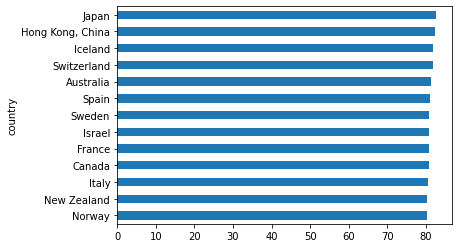

In [20]:
result.life_exp.plot.barh()

In [21]:
#
# Iteración sobre un dataframe
# ===============================================
#
for label, row in result.iterrows():
    print('Label: ' + label + "  Continent: " + row['cont'])

Label: Norway  Continent: Europe
Label: New Zealand  Continent: Oceania
Label: Italy  Continent: Europe
Label: Canada  Continent: Americas
Label: France  Continent: Europe
Label: Israel  Continent: Asia
Label: Sweden  Continent: Europe
Label: Spain  Continent: Europe
Label: Australia  Continent: Oceania
Label: Switzerland  Continent: Europe
Label: Iceland  Continent: Europe
Label: Hong Kong, China  Continent: Asia
Label: Japan  Continent: Asia


In [22]:
#
# Adición de una columna
#
for label, row in result.iterrows():
    result.loc[label, 'name_length'] = len(label)
    
result

year   population      cont  life_exp      gdp_cap  \
country                                                                
Norway            2007    4627926.0    Europe    80.196  49357.19017   
New Zealand       2007    4115771.0   Oceania    80.204  25185.00911   
Italy             2007   58147733.0    Europe    80.546  28569.71970   
Canada            2007   33390141.0  Americas    80.653  36319.23501   
France            2007   61083916.0    Europe    80.657  30470.01670   
Israel            2007    6426679.0      Asia    80.745  25523.27710   
Sweden            2007    9031088.0    Europe    80.884  33859.74835   
Spain             2007   40448191.0    Europe    80.941  28821.06370   
Australia         2007   20434176.0   Oceania    81.235  34435.36744   
Switzerland       2007    7554661.0    Europe    81.701  37506.41907   
Iceland           2007     301931.0    Europe    81.757  36180.78919   
Hong Kong, China  2007    6980412.0      Asia    82.208  39724.97867   
Japan             2007  127467972.0      Asia    82.603  31656.06806   

                  name_length  
country                        
Norway                    6.0  
New Zealand              11.0  
Italy                     5.0  
Canada                    6.0  
France                    6.0  
Israel                    6.0  
Sweden                    6.0  
Spain                     5.0  
Australia                 9.0  
Switzerland              11.0  
Iceland                   7.0  
Hong Kong, China         16.0  
Japan                     5.0

In [23]:
#
# Convierte el indice en una columna y elimina
# la columna name_length
#
result = result.reset_index()
result.pop('name_length')
result.head()

country  year  population      cont  life_exp      gdp_cap
0       Norway  2007   4627926.0    Europe    80.196  49357.19017
1  New Zealand  2007   4115771.0   Oceania    80.204  25185.00911
2        Italy  2007  58147733.0    Europe    80.546  28569.71970
3       Canada  2007  33390141.0  Americas    80.653  36319.23501
4       France  2007  61083916.0    Europe    80.657  30470.01670

In [24]:
result['name_length'] = result['country'].map(len)
result.head()

country  year  population      cont  life_exp      gdp_cap  name_length
0       Norway  2007   4627926.0    Europe    80.196  49357.19017            6
1  New Zealand  2007   4115771.0   Oceania    80.204  25185.00911           11
2        Italy  2007  58147733.0    Europe    80.546  28569.71970            5
3       Canada  2007  33390141.0  Americas    80.653  36319.23501            6
4       France  2007  61083916.0    Europe    80.657  30470.01670            6